In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
from sklearn.datasets import load_iris

In [34]:
iris=load_iris()

In [35]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)

In [37]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y=iris.target

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 20% data for testing purpose

In [44]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\nsquared_error = 0.658\nsamples = 120\nvalue = 0.992'),
 Text(0.23076923076923078, 0.7857142857142857, 'squared_error = 0.0\nsamples = 40\nvalue = 0.0'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nsquared_error = 0.25\nsamples = 80\nvalue = 1.488'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nsquared_error = 0.026\nsamples = 37\nvalue = 1.027'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.0\nsamples = 36\nvalue = 1.0'),
 Text(0.23076923076923078, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nsquared_error = 0.103\nsamples = 43\nvalue = 1.884'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nsquared_error = 0.25\nsamples = 8\nvalue = 1.5'),
 Text(0.3076923076923077, 0.35714285714285715, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nsquared_error = 0.2

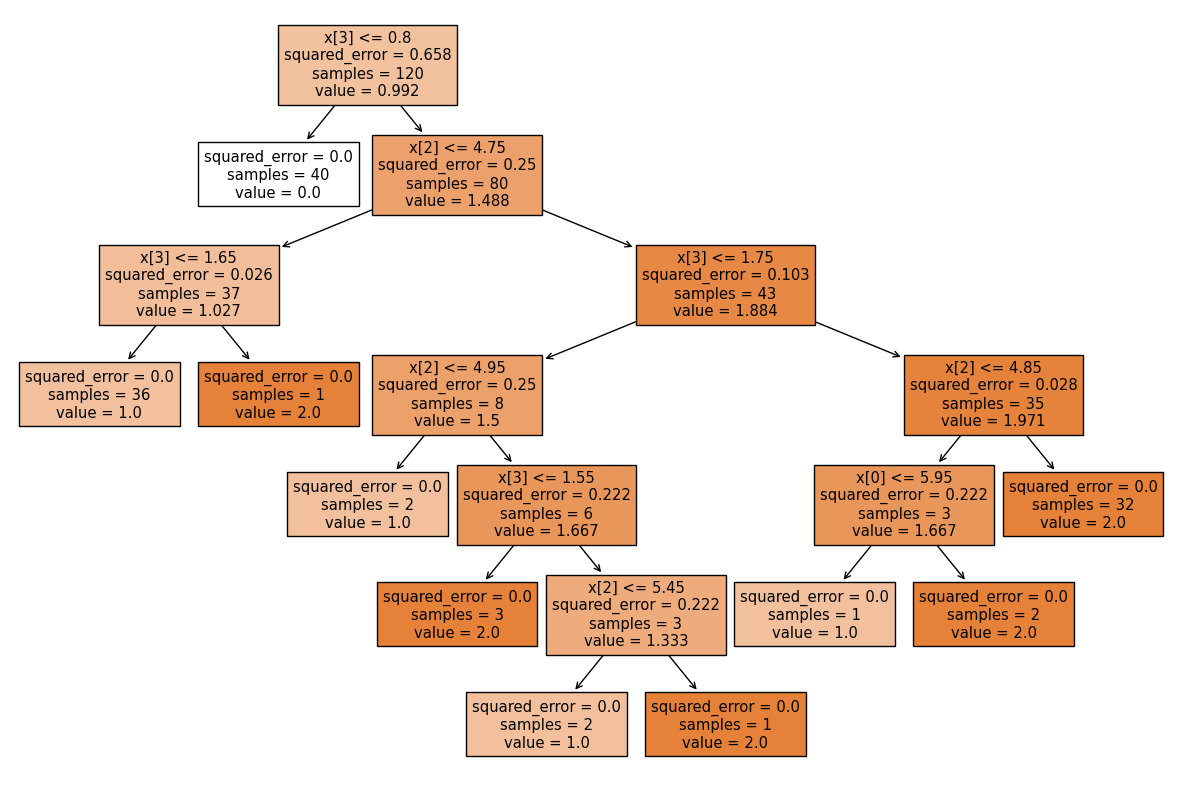

In [45]:
from sklearn import tree
ply.figure(figsize=(15,10)) 
tree.plot_tree(model,filled=True)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_regressor = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_regressor)
mse = mean_squared_error(y_test, y_pred_regressor)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_regressor)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R² Score: 1.0


In [55]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=2)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

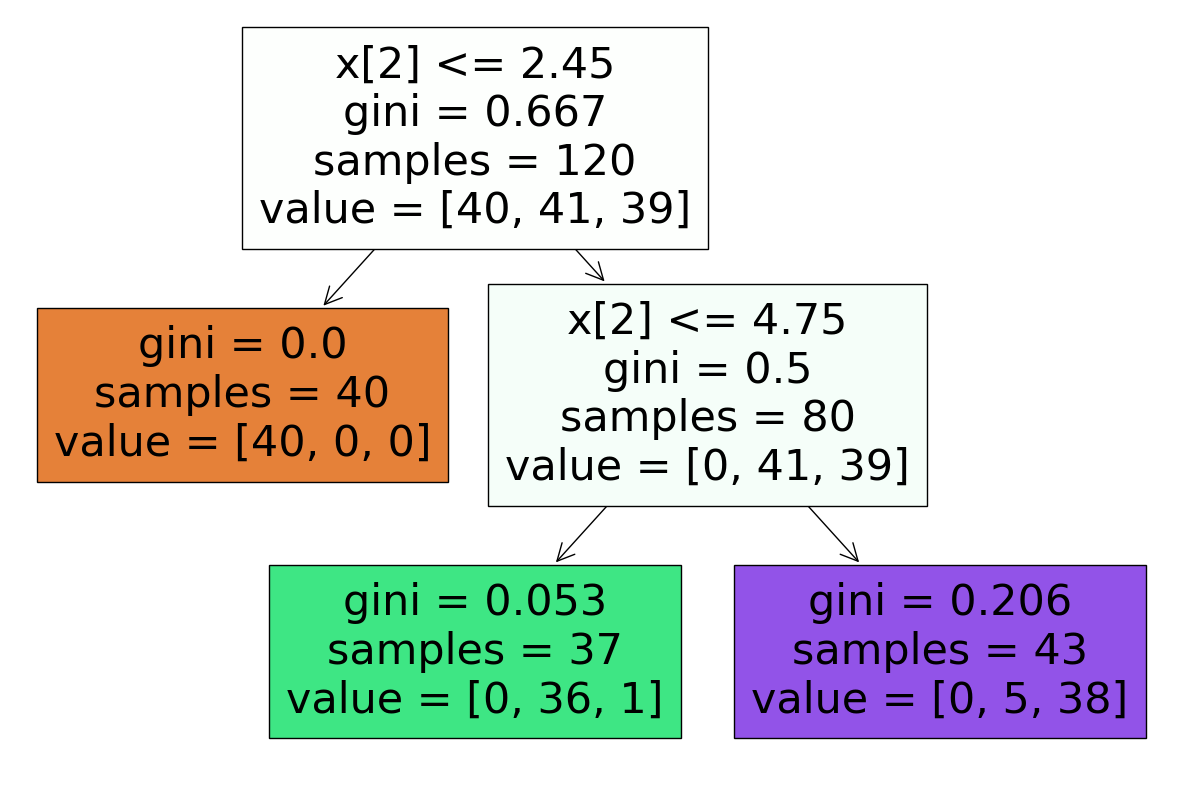

In [56]:
ply.figure(figsize=(15, 10))
tree.plot_tree(model2, filled=True,)
ply.show()

Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1 Score: 0.9658994032395567


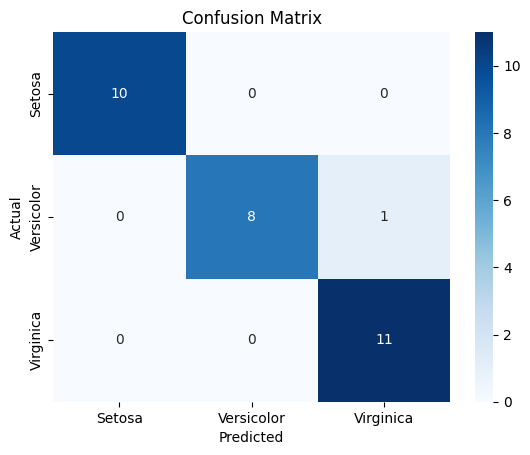

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
y_pred_classifier = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_classifier)
precision = precision_score(y_test, y_pred_classifier, average='macro')  # or 'macro' for multi-class
recall = recall_score(y_test, y_pred_classifier, average='macro')  # or 'macro' for multi-class
f1 = f1_score(y_test, y_pred_classifier, average='macro')  # or 'macro' for multi-class
conf_matrix = confusion_matrix(y_test, y_pred_classifier)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix
class_labels = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
ply.ylabel('Actual')
ply.xlabel('Predicted')
ply.title('Confusion Matrix')
ply.show()

#Hyperparameter Tuning  and pre-pruning

In [57]:
from sklearn.model_selection import GridSearchCV
param={'criterion':['gini','entropy','log_loss'],'max_depth': [1,2,3,4,5], 'min_samples_split': np.arange(2, 5),'max_features': ['auto', 'sqrt', 'log2']}

In [60]:
import warnings
warnings.filterwarnings('ignore') 
tree_clf = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
multi_class = GridSearchCV(estimator=tree_clf, param_grid=param, scoring=scoring, cv=5,refit='accuracy')
multi_class.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4])},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [61]:
multi_class.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 3}

In [62]:
y_pred = multi_class.predict(x_test)

Accuracy: 1.0
Precision: 1.0


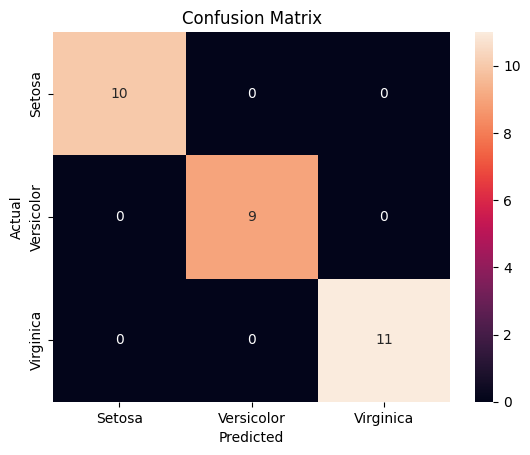

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
cm=confusion_matrix(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}') 
# Confusion matrix
class_labels = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
ply.ylabel('Actual')
ply.xlabel('Predicted')
ply.title('Confusion Matrix')
ply.show()